# WeRateDogs Data Wrangling Project



# Table of Contents
- [Data Gathering](#DG)
- [Assessing Data](#AD)
- [Cleaning Data](#CD)
- [Analyzing Data](#AND)


In [69]:
#Import Packages
import pandas as pd
import numpy as np
import os
import requests
import io
import json
import time

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set (style = "darkgrid")

from scipy import stats

<a id='DG'></a>
## Data Gathering

- [1. Enhanced Twitter Archive](#ETA)

- [2. Image prediction](#EP)

- [3. JSON Data](#JD)

<a id='ETA'></a>
**1. Enhanced Twitter Archive**

In [71]:
# load the enhanced twitter archive file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<a id='EP'></a>
**2. Image Predictions File**

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network



In [72]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_prediction.tsv' , mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_prediction.tsv', delimiter ='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='JD'></a>
**3. JSON Data**

In [4]:
json_url='https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response =requests.get(json_url).content.decode('utf-8')
tweets_json = pd.read_json(response, lines = True)
tweets_json.head()



,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [5]:
#show only the neccessary columns 
tweets_json_edit = tweets_json[['id', 'favorite_count' , 'retweet_count']]

tweets_json_edit.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


<a id='AD'></a>
## Assessing Data

In this stage, we are inspecting the dataset for two things: 
1. data quality issues (i.e. content issues : missing values, duplicated values)
2. lack of tidiness (i.e. structural issues)

the inspection will be done visually and programmatically for dataset:

- [1. Assessing - Enhanced Twitter Archive](#ETAC)

- [2. Assessing - Image prediction](#IPC)

- [3. Assessing - JSON Data](#JDC)

<a id='ETAC'></a>
**1. Assessing - Enhanced Twitter Archive**

In [6]:
#Assess Visually
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#Assess Programmatically
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#From visual assessment, checking Missing name programmatically
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Bailey         7
an             7
Toby           7
Daisy          7
Oscar          6
Rusty          6
Bella          6
Scout          6
Stanley        6
Jack           6
Dave           6
Jax            6
Milo           6
Leo            6
Koda           6
Phil           5
            ... 
Wiggles        1
Ebby           1
Jordy          1
Alf            1
Eazy           1
Bookstore      1
Vinnie         1
Gabby          1
Randall        1
William        1
Halo           1
Ace            1
Suki           1
Bradley        1
Rorie          1
Juckson        1
Beckham        1
Sora           1
Mutt           1
Rumble         1
Dixie          1
Oreo           1
Darla          1
Pilot          1
life           1
space          1
Augie          1
Yukon         

In [9]:
#From visual assessment, checking if name started with lowercase indicate non-dog_name
non_dog_name = twitter_archive.name.str.contains('^[a-z]', regex = True)
twitter_archive[non_dog_name].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [10]:
len(twitter_archive[non_dog_name])

109

In [11]:
# From visual assessment, there are some missing value for 'doggo','floofer','pupper','puppo' as printed as 'None'. Check programmatically
twitter_archive['doggo'].value_counts(), twitter_archive['floofer'].value_counts(), twitter_archive['pupper'].value_counts(),twitter_archive['puppo'].value_counts()


(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [12]:
#Assess duplicated value
twitter_archive.duplicated().any()

False

In [13]:
twitter_archive[twitter_archive['tweet_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
#From visual assessmnet, there are some rows are retweets which out of our interest
#check programmatically
twitter_archive[['retweeted_status_id' , 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any()


retweeted_status_id           True
retweeted_status_user_id      True
retweeted_status_timestamp    True
dtype: bool

**Quality Issue:**
- Data type: Timestamp datatype should be DateTime not an object
- Column name: 745 missing value (None)
- Column name: 109 are non dog name
- We are only interested with tweet not retweet, thus only keep columns with NaN for 'retweeted_status_id' and 'retweeted_status_user_id'
- missing value for 'doggo','floofer','pupper','puppo' as printed as 'None' (2259 data)
- some rating numerator and rating denominator values are not correct


**Tidiness Issue:**
- doggo, floofer, pupper, and puppo can be melt and name the column into "phase"
- we only interested with original ratings with, hence drop the uneccessary retweet column (retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)
- we only interested with original ratings with, hence drop the uneccessary reply column (in_reply_to_status_id , in_reply_to_user_id)

<a id='IPC'></a>
**2. Assessing - Image prediction**

In [15]:
#Assess visually
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
#Assess Programmatically
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No missing value for image_predictions

In [17]:
#Assess duplicated value
image_predictions.duplicated().any()

False

In [18]:
image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [19]:
#Assess false prediction
false_prediction = image_predictions[~image_predictions.p1_dog & \
               ~image_predictions.p2_dog & \
               ~image_predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']]
false_prediction.head()

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False


In [20]:
len(false_prediction)

324

**Quality Issue:**
- Dog name in p1, p2, p3 are began with Uppercase sometimes, lowercase other time.
- Dog name : replace '-' with space
- There are 324 prediction data that shows no valid dog from all the prediction (p1,p2,p3)
- Missing 281 data for jpg_url from the total 2356 data based on the twitter_archive dataset (2075 out of 2356)


**Tidiness Issue:**
- None

<a id='JDC'></a>
**3. Assessing - JSON Data**

In [21]:
tweets_json_edit

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [22]:
tweets_json_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
tweets_json_edit.duplicated().any()

False

**Quality Issue:**
- only 2354 id data, missing 2 data compared with the twitter_archive

**Tidiness Issue:**
- JSON data should be merged with Twitter_archive dataset

## Overall Issue:


### Quality Issue:

_Twitter Archive:_
1. Data type: Timestamp datatype should be DateTime not an object
2. Column name: 745 missing value (None)
3. Column name: 109 are non dog name
4. We are only interested with tweet not retweet, thus only keep columns with NaN for 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp '
5. missing value for 'doggo','floofer','pupper','puppo' as printed as 'None' (2259 data)
6. some rating numerator and rating denominator values are not correct

_Image Prediction:_
7. Dog name in p1, p2, p3 are began with Uppercase sometimes, lowercase other time.
8. Dog name : replace '_' with space
9. There are 324 prediction data that shows no valid dog from all the prediction (p1,p2,p3)

_JSON Data:_
10. only 2354 id data, missing 2 data compared with the twitter_archive


### Tidiness Issue: 

_Twitter Archive:_
1. doggo, floofer, pupper, and puppo can be melt and name the column into "phase"
2. we only interested with original ratings with, hence drop the uneccessary retweet column (retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)
3. we only interested with original ratings with, hence drop the uneccessary reply column (in_reply_to_status_id , in_reply_to_user_id)

_ImagePrediction:_
5. Only keep necessary data such as tweet_id, jpg_url, dog1, dog2, dog3
_JSON Data:_
6. JSON data should be merged with Twitter_archive dataset

_For Analysing Purpose:_
7. Merge Twitter_archive, Image_prediction, and JSON dataset


<a id='CD'></a>
## Cleaning Data


In [24]:
tw_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
j_clean = tweets_json_edit.copy()

### Quality Issue
### 1. Twitter Archive

1.1 Data type: Timestamp datatype should be DateTime not an object

**Define : Change datatype for timestamp into datetime**

**Code**

In [25]:
tw_clean.timestamp=pd.to_datetime(tw_clean.timestamp)

**Test**

In [26]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

1.2 Column name: 745 missing value (None)

**Define : 745 missing value for dog name, too much data to be dropped - issue is not going to be addressed**

1.3 Column name: 109 are non dog name

**Define : 109 are non dog name, change those into 'None'**

**Code**

In [27]:
tw_clean['name'] = tw_clean['name'].str.replace(r'\b[a-z][a-zA-Z0-9]*\b','None')

**Test**

In [28]:
tw_clean.name.value_counts()

None        854
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
Buddy         7
Daisy         7
Bailey        7
Toby          7
Jax           6
Koda          6
Leo           6
Rusty         6
Milo          6
Oscar         6
Jack          6
Stanley       6
Dave          6
Scout         6
Bella         6
Bentley       5
Gus           5
Sunny         5
Louis         5
           ... 
Tiger         1
Billl         1
Kevon         1
Taco          1
Kody          1
Harry         1
Augie         1
Pilot         1
Darla         1
Oreo          1
Divine        1
Mac           1
Jomathan      1
Baron         1
Sailer        1
Gabby         1
William       1
Halo          1
Ace           1
Suki          1
Bradley       1
Rorie         1
Juckson       1
Nico          1
Beckham       1
Sora          1
Randall       1
Mutt          1
Dixie         1
Ralphie       1
Name: name, Length: 932,

In [29]:
non_dog_name = tw_clean.name.str.contains('^[a-z]', regex = True)
tw_clean[non_dog_name].name.value_counts()

Series([], Name: name, dtype: int64)

1.4 

**Define:** We are only interested with tweet not retweet, thus only keep columns with NaN for 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp '

**Code**

In [30]:
tw_clean = tw_clean[(tw_clean['retweeted_status_id'].isnull()) & 
                    (tw_clean['retweeted_status_user_id'].isnull()) & 
                    (tw_clean['retweeted_status_timestamp'].isnull())]

**Test**

In [31]:
tw_clean[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].notnull().any()

retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
dtype: bool

1.5

**Define:** missing value for 'doggo','floofer','pupper','puppo' as printed as 'None' (2259 data)

**Code**

In [32]:
tw_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
tw_clean.doggo=tw_clean.doggo.replace('None','')
tw_clean.floofer=tw_clean.floofer.replace('None','')
tw_clean.pupper=tw_clean.pupper.replace('None','')
tw_clean.puppo=tw_clean.puppo.replace('None','')

**Test**

In [34]:
tw_clean[['doggo', 'floofer' , 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,


1.6

**Define:** some rating numerator and rating denominator values are not correct

Some not normal value can be accessed by calculating Rating Ratio.
Rating Ration can be formulated as rating_numerator divided by rating_denominator

In [35]:
#Convert the value into numeric
tw_clean['rating_numerator'] = pd.to_numeric(tw_clean['rating_numerator'])
tw_clean['rating_denominator']=pd.to_numeric(tw_clean['rating_denominator'])

#Calculating Rating Ratio
tw_clean['rating_ratio']=tw_clean['rating_numerator']/tw_clean['rating_denominator']

In [36]:
tw_clean['rating_ratio'].value_counts()

1.200000      504
1.000000      444
1.100000      431
1.300000      307
0.900000      156
0.800000       98
0.700000       53
1.400000       43
0.500000       37
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
42.000000       2
0.000000        2
0.818182        1
1.250000        1
66.600000       1
1.500000        1
inf             1
7.500000        1
177.600000      1
2.600000        1
3.428571        1
0.636364        1
1.700000        1
0.733333        1
2.700000        1
18.200000       1
Name: rating_ratio, dtype: int64

Keep ratio value in between 0 and 3

In [37]:
tw_clean = tw_clean[tw_clean['rating_ratio']< 3]
tw_clean = tw_clean[tw_clean['rating_ratio']> 0]

In [38]:
tw_clean['rating_ratio'].value_counts().sort_values(ascending = False)

1.200000    504
1.000000    444
1.100000    431
1.300000    307
0.900000    156
0.800000     98
0.700000     53
1.400000     43
0.500000     37
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      7
1.500000      1
1.700000      1
0.818182      1
2.700000      1
0.636364      1
2.600000      1
1.250000      1
0.733333      1
Name: rating_ratio, dtype: int64

### 2. Image Prediction

2.7 Dog name in p1, p2, p3 are began with Uppercase sometimes, lowercase other time.

2.8 Dog name : replace '_' with space

**Define:** Change the lowercase with uppercase and replace '-' with space

**Code**

In [39]:
#Replace '_' with space
image_clean['p1'] = image_clean['p1'].str.replace('_',' ')
image_clean['p2'] = image_clean['p2'].str.replace('_',' ')
image_clean['p3'] = image_clean['p3'].str.replace('_',' ')

In [40]:
#Change the lowercase to Uppercase
image_clean['p1'] = image_clean['p1'].str.capitalize()
image_clean['p2'] = image_clean['p2'].str.capitalize()
image_clean['p3'] = image_clean['p3'].str.capitalize()

**Test**

In [41]:
image_clean.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True


2.9 There are 324 prediction data that shows no valid dog from all the prediction (p1,p2,p3)

**Define:** Replace the non-dog name with 'None'

**Code**

In [42]:
#Create new column for dog
image_clean[['p1_dog', 'p2_dog','p3_dog']]=image_clean[['p1_dog','p2_dog','p3_dog']].astype(str)
#if dog, print as dog breed
image_clean[['dog1','dog2','dog3']] = image_clean[['p1','p2','p3']]

#Otherwise, replace non-dog name with 'None' based on the p1_dog if False
image_clean.loc[image_clean['p1_dog']=='False', 'dog1'] = 'None'
image_clean.loc[image_clean['p2_dog']=='False', 'dog2'] = 'None'
image_clean.loc[image_clean['p3_dog']=='False', 'dog3'] = 'None'

**Test**

In [43]:
image_clean.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog1,dog2,dog3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,Welsh springer spaniel,Collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,Redbone,Miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German shepherd,Malinois,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,Rhodesian ridgeback,Redbone,Miniature pinscher


### 3. JSON Data

3.10

**Define:** 
only 2354 id data, missing 2 data compared with the twitter_archive (Not to be addressed)

## Tidiness Issue



Ask mattia, np.nan doesnt work, at phase column, it doesnt show up if value = nan

### 1.1 doggo, floofer, pupper, and puppo can be melt and name the column into "phase"

**Define:** Drop unnecessary columns in image prediction

In [44]:
tw_clean['phase']=tw_clean.doggo.str.cat(tw_clean.floofer).str.cat(tw_clean.pupper).str.cat(tw_clean.puppo)
tw_clean.stage=tw_clean.phase.replace('',np.nan)

C:\Users\winar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [45]:
#Drop doggo, floofer, pupper, and puppo columns as it have been merged in the phase columns
tw_clean=tw_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [46]:
#test
tw_clean.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating_ratio,phase
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,


### 1.2 we only interested with original ratings with, hence drop the uneccessary retweet column (retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)

### 1.3 we only interested with original ratings with, hence drop the uneccessary reply column (in_reply_to_status_id , in_reply_to_user_id)

**Define:** drop the unnecessary columns for tidiness purpose



**Code**

In [47]:
tw_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1 , inplace= True)

**Test**

In [48]:
tw_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_ratio',
       'phase'],
      dtype='object')

### 1.5 Only keep necessary data such as tweet_id, jpg_url, dog1, dog2, dog3

In [49]:
#Drop unnecessary Columns
image_clean.drop(['img_num','p1', 'p1_conf','p1_dog','p2', 'p2_conf','p2_dog','p3', 'p3_conf','p3_dog'], axis=1 , inplace = True)

In [50]:
#Check
image_clean.head()

,tweet_id,jpg_url,dog1,dog2,dog3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,Collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,Miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,Malinois,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,Redbone,Miniature pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher,Rottweiler,Doberman


### 1.6 JSON data should be merged with Twitter_archive dataset

**Define:** Rename the 'id' in JSON to become 'tweet_id' for merging the dataset purpose

**Code**

In [51]:
#Rename 'id' to 'tweet_id'
j_clean.rename(index=str, columns = {'id' : 'tweet_id'}, inplace = True)

**Test**

In [52]:
j_clean.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


### 1.7 Merge cleaned Twitter_archive, cleaned Image_prediction, and cleaned JSON dataset

**Define:** Merge the three cleaned datasets

**Code**

In [53]:
complete_df = tw_clean.merge(image_clean, on = 'tweet_id').merge(j_clean, on = 'tweet_id')


**Test**

In [54]:
complete_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_ratio,phase,jpg_url,dog1,dog2,dog3,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,None,None,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,Papillon,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,Malamute,Kelpie,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador retriever,None,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,English springer,German short-haired pointer,41048,9774


## Storing Data

In [55]:
#save the dataset
complete_df.to_csv('twitter_archive_master.csv')

## Analysis

### 1.Rating Ratio Analysis

In [56]:
complete_df[['rating_ratio' ,'favorite_count', 'retweet_count' ]].describe()

,rating_ratio,favorite_count,retweet_count
count,1988.000000,1988.000000,1988.000000
mean,1.056818,8888.608652,2765.244970
std,0.222464,12222.782198,4680.216786
min,0.100000,81.000000,16.000000
25%,1.000000,1967.500000,623.750000
50%,1.100000,4118.500000,1350.000000
75%,1.200000,11304.000000,3220.000000
max,2.700000,132810.000000,79515.000000


In [57]:
#for a better data visualization, we round up the decimals 
complete_df= complete_df.round({'rating_ratio': 1})
values=np.sort(complete_df.rating_ratio.unique())
values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 2.6, 2.7])

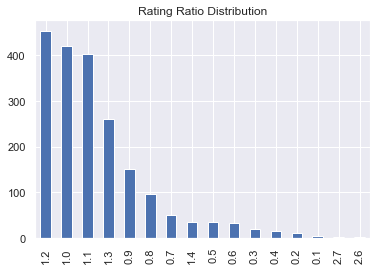

In [75]:
complete_df.rating_ratio.value_counts().plot(kind = 'bar', title='Rating Ratio Distribution')

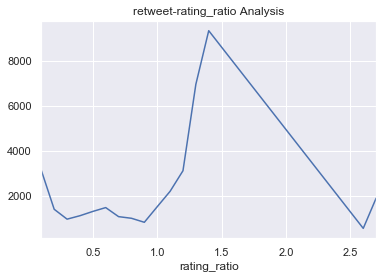

In [59]:
complete_df.groupby('rating_ratio')['retweet_count'].mean().plot(title='retweet-rating_ratio Analysis',kind='line')

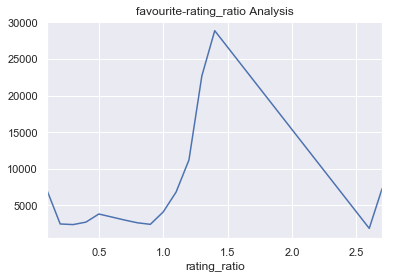

In [60]:
complete_df.groupby('rating_ratio')['favorite_count'].mean().plot(title='favourite-rating_ratio Analysis',kind='line')

The average rating ration is 1.05 based on the observation that has been made, there is some certain range that have a positive relationship with number of retweet and favorite. the optimum range of rating ratio lies between 1-1.3 where ratio number is either smaller or bigger will be not the most optimum number of retweet and favorite

### 2. Dog Breeds Analysis

We will make an analysis based on dog1 since it has the highest posibility value of image prediction

In [61]:
dogbreed = complete_df.groupby(by = 'dog1')[['rating_ratio','retweet_count' , 'favorite_count']].sum()
dogbreed.head(3)

,rating_ratio,retweet_count,favorite_count
dog1,,,
Afghan hound,2.9,17928,51980
Airedale,11.8,16725,63370
American staffordshire terrier,14.3,28664,98274


In [62]:
#Since there are some none value under dog breed, we should remove 'None' value
dogbreed = dogbreed.drop('None')


In [63]:
#Sorting value based on rating ratio
dogbreed_rating = dogbreed.sort_values(by = 'rating_ratio', ascending = False)['rating_ratio'].head(10)
dogbreed_rating.head()

dog1
Golden retriever      159.1
Labrador retriever    105.7
Pembroke              100.7
Chihuahua              84.6
Pug                    55.3
Name: rating_ratio, dtype: float64

In [64]:
#Sorting value based on retweet count
dogbreed_retweet = dogbreed.sort_values(by = 'retweet_count', ascending = False)['retweet_count'].head(10)
dogbreed_retweet.head()

dog1
Golden retriever      500441
Labrador retriever    366682
Pembroke              280367
Chihuahua             220695
Samoyed               184922
Name: retweet_count, dtype: int64

In [65]:
#Sorting value based on favorite count
dogbreed_favorite = dogbreed.sort_values(by = 'favorite_count', ascending = False)['favorite_count'].head(10)
dogbreed_favorite.head()

dog1
Golden retriever      1690700
Labrador retriever    1123850
Pembroke               994755
Chihuahua              676441
Samoyed                542991
Name: favorite_count, dtype: int64

Text(0.5, 1.0, 'Top Dog breeds based on favorite')

<Figure size 432x288 with 0 Axes>

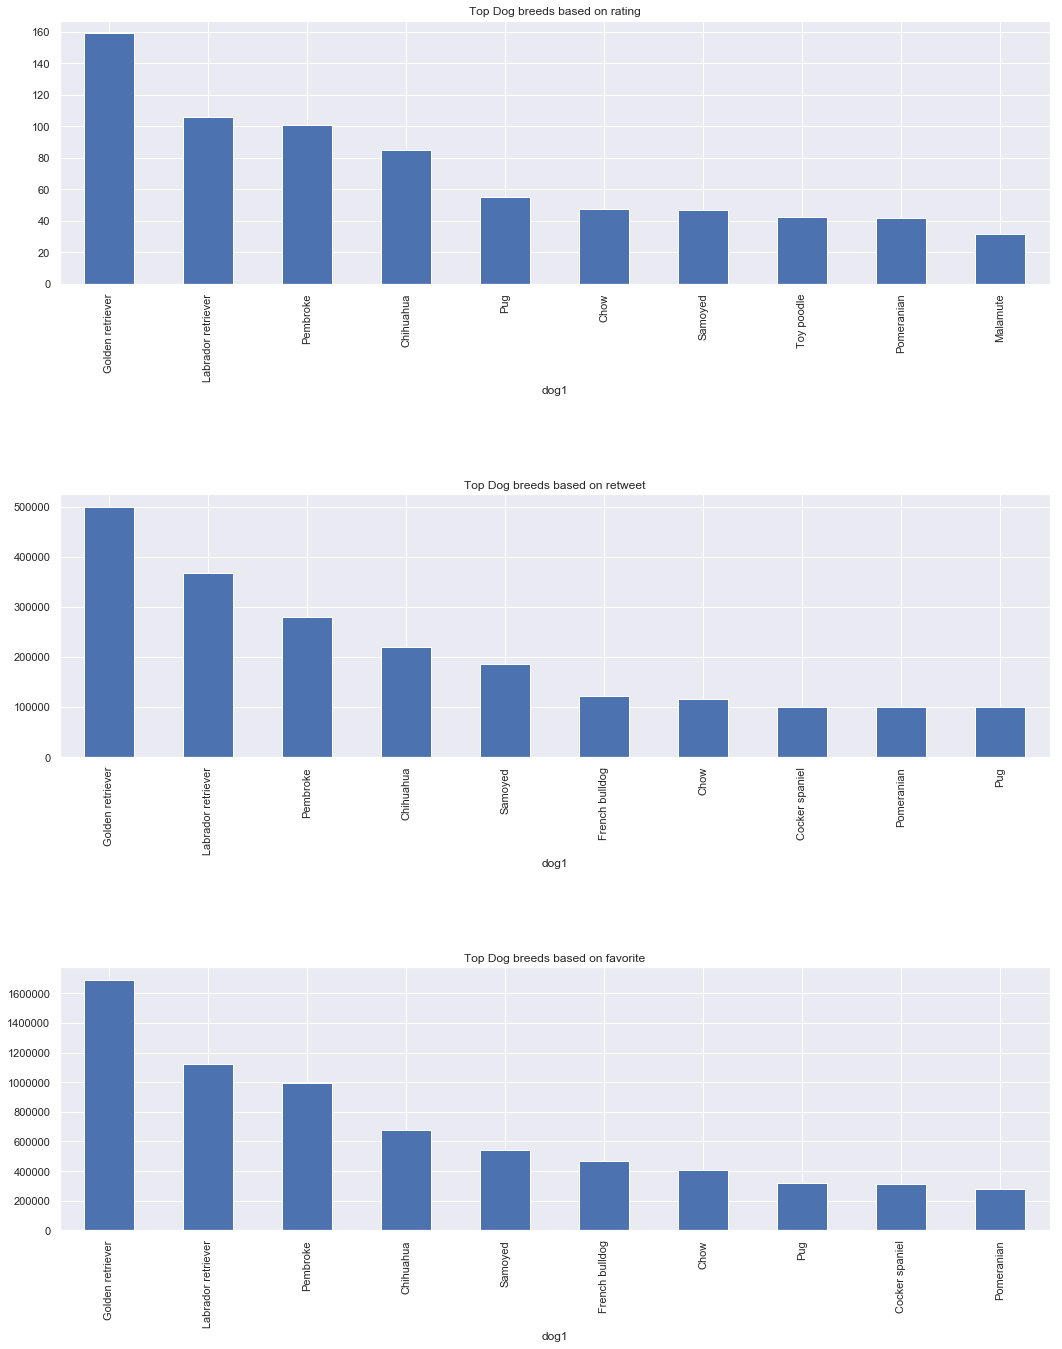

In [66]:
plt.figure()
figure, axes = plt.subplots(3,1)
figure.set_figheight(12)
figure.set_figwidth(10)
plt.subplots_adjust(left=0.125, bottom = 0.1, top = 1.5, right = 1.5, wspace=0.4, hspace=0.8)
dogbreed_rating.plot(kind='bar' , ax = axes[0]).set_title('Top Dog breeds based on rating')
dogbreed_retweet.plot(kind='bar', ax = axes[1]).set_title('Top Dog breeds based on retweet')
dogbreed_favorite.plot(kind='bar' , ax = axes[2]).set_title('Top Dog breeds based on favorite') 

Based on the above observation, Type of dog breeds that always be in top rating, favorite, and retweet are Golden Retriever, Labrador Retriever, Pembroke, Cihuahua, and followed by Samoyed or Pug (only for rating).

Golden Retriever is the most favourite, rated, and retweet dog breed and it has significant difference with other type of dog breeds, as we can refer Labrador Retriever

### 3. Relationship between Time and Favourite and Retweet

In [67]:
time_df = complete_df [['timestamp','retweet_count','favorite_count']]
time_df.head()

,timestamp,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,8853,39467
1,2017-08-01 00:17:27+00:00,6514,33819
2,2017-07-31 00:18:03+00:00,4328,25461
3,2017-07-30 15:58:51+00:00,8964,42908
4,2017-07-29 16:00:24+00:00,9774,41048


Text(0.5, 1.0, 'Relationship between time and favourite and retweet')

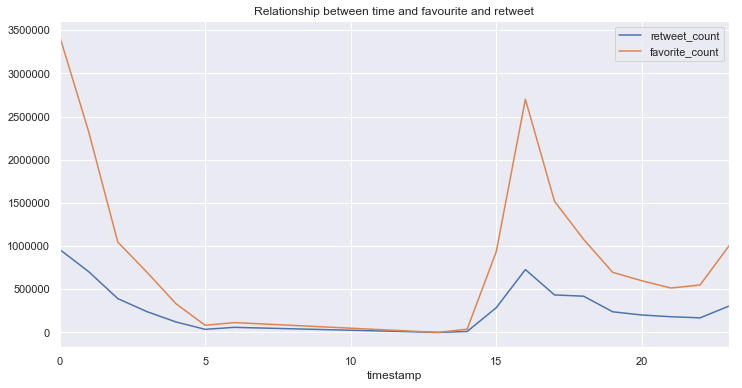

In [68]:
time_df.groupby(by=time_df['timestamp'].dt.hour).sum().plot(kind='line', figsize=(12,6)).set_title('Relationship between time and favourite and retweet') 

Based on the observation on above chart, it shows that the optimum time of people engaging in twitter is approximately from 03:00pm - 07:00pm and start to decrease during dinner time (07:00pm - 10:00pm) and it increases significantly to the peak point in the midnight time from 11:00pm - 02:00am. This would suggest that in order to achieve high retweet and favorite, it's recommended to post the tweet within the above suggested time since there is more people engaging with social media. 